In [2]:
%matplotlib inline
import pandas as pd

In [42]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [58]:
#cast = pd.read_csv('data/cast.csv')
#cast.head()
cast = pd.read_csv('data/truncated_cast.csv')
cast

,Unnamed: 0,title,year,name,type,character,n
0,0,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
1,1,The Colour of Darkness,2016,Ketan Daraji -Gohel,actor,Chhagan,NaN
2,2,London Betty,2009,Isaiah Entsua -Mensah,actor,Camera Man,NaN
3,3,Candelabra,2014,Groovin .,actor,Lt. Dick Sims,5.0
4,4,Bad Ideas,2012,Hamid .,actor,The Diner,NaN
...,...,...,...,...,...,...,...
422955,1884292,Two Way Stretch,1960,Peter Sellers,actor,Dodger Lane,1.0
422956,1884293,Up the Creek,1958,Peter Sellers,actor,CPO Doherty,2.0
422957,1884294,Waltz of the Toreadors,1962,Peter Sellers,actor,Gen. Leo Fitzjohn,1.0
422958,1884295,What's New Pussycat,1965,Peter Sellers,actor,Dr. Fritz Fassbender,1.0


In [44]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Patriarchs,2009
1,Angels in the Attic,1998
2,The Rapture,1991
3,Star na si Van Damme Stallone,2016
4,Sweet Talk,2004


<AxesSubplot:xlabel='year'>

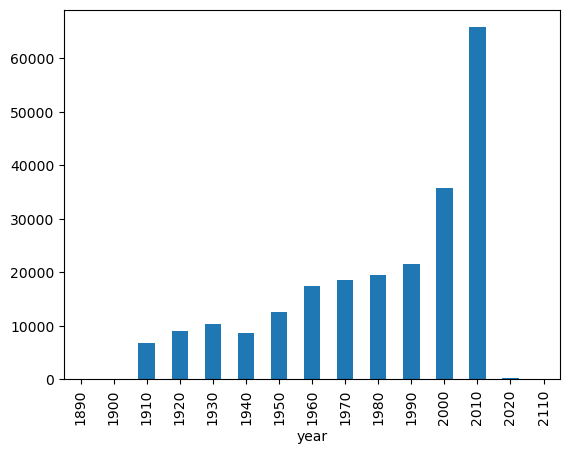

In [45]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

<AxesSubplot:xlabel='year'>

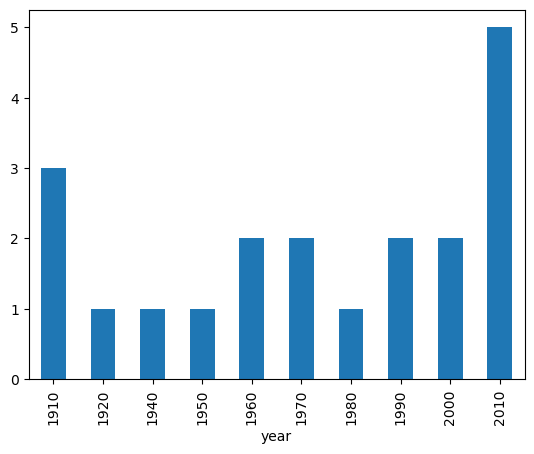

In [40]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [46]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      17
      actress     7
1951  actor      23
      actress     9
1952  actor      20
      actress    10
1953  actor      18
      actress     9
1954  actor      23
      actress     9
1955  actor      25
      actress     7
1956  actor      19
      actress     4
1957  actor      27
      actress    10
1958  actor      18
      actress     6
1959  actor      26
      actress     7
dtype: int64

In [47]:
# In the 1950s decade taken as a whole,
# how many total roles were available to actors,
# and how many to actresses, for each "n" number 1 through 5?

c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      216
     actress     78
2.0  actor      145
     actress    137
3.0  actor      174
     actress     95
4.0  actor      165
     actress     67
5.0  actor      148
     actress     65
dtype: int64

In [85]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,2.0
2006,10.0


A look at the data reveals a potential issue with this solution; there are `NaN`s in the `n` column; do these not count as listed roles?

In [49]:
c = cast
c = c[(c.title == 'The Pink Panther')&(c['year']==1963)]
print(len(c['n']),len(c['n'].dropna()))
c[:10]

1 1


,Unnamed: 0,title,year,name,type,character,n
422942,1884278,The Pink Panther,1963,Peter Sellers,actor,Insp. Jacques Clouseau,2.0


A second issue with just taking the max of the `n` values for a year/title
group is that there are cases  of two different roles sharing the same `n`-value  in one film.

For example in in the 2006 version of *Pink Panther* one
actress is credited for two roles of rank 16.

In [50]:
c = cast
c = c[(c.title == 'The Pink Panther')&(c['year']==2006)]
# n==16 occurs twice because of one actress credited for two roles of rank 16. Find such cases by doing
#c.groupby('n').size().sort_values()
c[c['n']==16]

,Unnamed: 0,title,year,name,type,character,n


To count the `n==NaN` roles as well as roles sharing `n`-values, we could alternatively do:

In [30]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n').groupby(['year']).size()
c

year
1963    21
2006    90
dtype: int64

In [10]:
# List, in order by year, each of the films
# in which Frank Oz has played more than 1 role.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

In [11]:
# List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64

An interesting variant on the above question.

In [59]:
# List each of the movies (year/title pairs) in which Peter Sellers
# has played at least two roles

c = cast
c = c[c.name == 'Peter Sellers']
# A series whose values contain the answer
num_roles = c.groupby(['year', 'title']).size()
# constrain to the right rows
num_roles[num_roles > 1]

year  title                                                               
1951  Penny Points to Paradise                                                2
1959  I'm All Right Jack                                                      2
      The Mouse That Roared                                                   3
1964  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb    3
1974  Soft Beds, Hard Battles                                                 6
1979  The Prisoner of Zenda                                                   3
1980  The Fiendish Plot of Dr. Fu Manchu                                      2
dtype: int64

In [82]:
# List the actor who has played the most roles in a single film
# together with the year and title of the film and the number of roles played.
# For extra credit (in a separate computation) list the roles.

c=cast
g_by = c.groupby(['name','year', 'title'])
ser = g_by.size()
# Use a splice to return a series (idx included), not a value, for largest group
ser_max = ser.sort_values(ascending=False)[0:1]
ser_max

name              year  title             
Dan Castellaneta  2007  The Simpsons Movie    21
dtype: int64

And here are the 21 roles.  Who can forget Castellaneta's performance as Multi-Eyed Squirrel?

In [83]:
g21 = g_by.get_group(ser_max.index[0])
g21

,Unnamed: 0,title,year,name,type,character,n
422867,335731,The Simpsons Movie,2007,Dan Castellaneta,actor,Homer Simpson,1.0
422868,335732,The Simpsons Movie,2007,Dan Castellaneta,actor,Itchy,1.0
422869,335733,The Simpsons Movie,2007,Dan Castellaneta,actor,Barney,1.0
422870,335734,The Simpsons Movie,2007,Dan Castellaneta,actor,Grampa,1.0
422871,335735,The Simpsons Movie,2007,Dan Castellaneta,actor,Stage Manager,1.0
422872,335736,The Simpsons Movie,2007,Dan Castellaneta,actor,Krusty the Clown,1.0
422873,335737,The Simpsons Movie,2007,Dan Castellaneta,actor,Mayor Quimby,1.0
422874,335738,The Simpsons Movie,2007,Dan Castellaneta,actor,Mayor's Aide,1.0
422875,335739,The Simpsons Movie,2007,Dan Castellaneta,actor,Multi-Eyed Squirrel,1.0
422876,335740,The Simpsons Movie,2007,Dan Castellaneta,actor,Panicky Man,1.0


Sanity check

In [84]:
len(g21)

21